In [1]:
%matplotlib notebook

import tables
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
sns.set()

In [2]:
loadfile = '/media/taufiq/Data1/Heart_Sound/ComParE2018_Heartbeat_/openSMILEall_PCG.mat'
attribfile = '/media/taufiq/Data1/Heart_Sound/ComParE2018_Heartbeat_/compareFeat.txt'

In [3]:
with open(attribfile,'rb') as fp:
    attrib = fp.read()
attrib = attrib.split('\n')
attrib = attrib[:-1] # removed trailing \n

In [96]:
# data = tables.open_file(loadfile)
data = scipy.io.loadmat(loadfile)

In [97]:
labels = [each[6] for each in data['TrainFiles']]
labels = np.asarray(labels).astype(str)

y = data['TrainLabels'].astype(int)
mask1 = labels == 'e'
mask2 = y == 1
labels[np.logical_and(mask1,mask2)] = 'k'

# subsets = ["INTERSPEECH HSS",
#             "MITHSDB (a)",
#             "AADHSDB (b)",
#             "AUTHHSDB (c)",
#             "UHAHSDB (d)",
#             "DLUTHSDB (e) - Normal",
#             "SUAHSDB (f)",
#             "DLUTHSDB (e) - Abnormal"]

subsets = ["Eko CORE Bluetooth",
"Welch Allyn Meditron",
"3M Littmann E4000",
"AUDIOSCOPE",
"Infral Corp. Prototype",
"MLT201/Piezo",
"JABES",
"3M Littmann"]
parser = dict(zip(np.unique(labels),subsets))

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [15]:
np.random.seed(1)
idx = np.random.choice(data['dataTrain'].shape[0], 3655, replace=False)
X_embed = data['dataTrain'][idx,:]
X_embed = scale(X_embed)

# X_embed = PCA(n_components=50).fit_transform(X_embed)

X_embedded = TSNE(n_components=2,
#                   learning_rate=60,
#                   early_exaggeration=1140.,
                  perplexity=480, #480-2, 150-3 without exagg and lr
                  init='random',
                  n_iter=2000,
                  verbose=1,
                  ).fit_transform(X_embed)
X_embedded.shape

[t-SNE] Computing 1441 nearest neighbors...
[t-SNE] Indexed 3655 samples in 0.580s...


/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


[t-SNE] Computed neighbors for 3655 samples in 111.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3655
[t-SNE] Computed conditional probabilities for sample 2000 / 3655
[t-SNE] Computed conditional probabilities for sample 3000 / 3655
[t-SNE] Computed conditional probabilities for sample 3655 / 3655
[t-SNE] Mean sigma: 21.301736
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.746826
[t-SNE] KL divergence after 2400 iterations: 0.540920


(3655, 2)

<IPython.core.display.Javascript object>


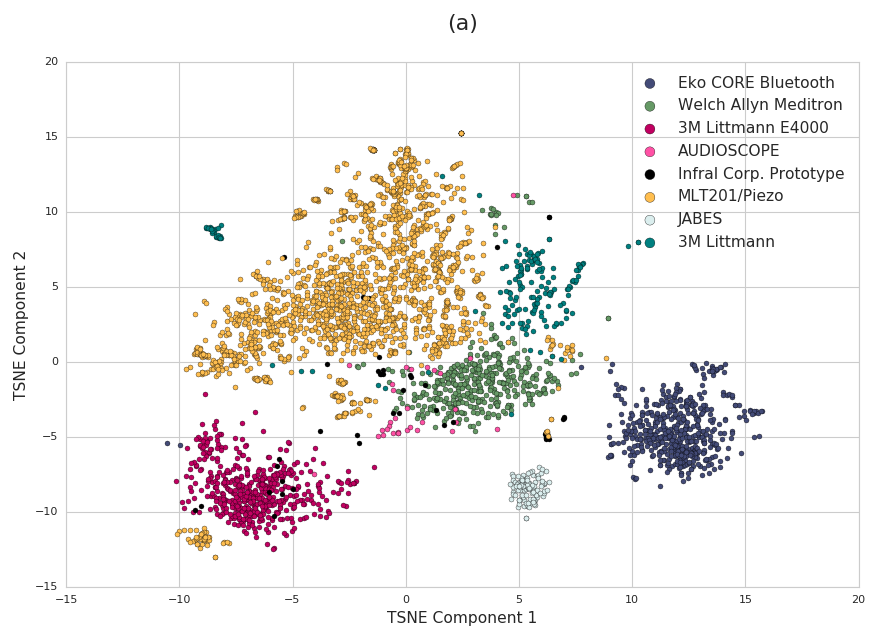

In [60]:
colors = ['#434B77','#669966','#c10061','#ff51a5','k','#ffbe4f','#DBEEEE','#008080']
markers = ["o","v","^","<",">","8","s","p"]
sns.set_style('whitegrid')
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=14)
font_title = font_manager.FontProperties(size=20)

fig = plt.figure(figsize=(11,8))
for stage,color in zip(np.unique(labels[idx]),colors):
    mask = labels[idx] == stage
    plt.scatter(-X_embedded[mask,0],-X_embedded[mask,1],c=color,label=parser[stage])
plt.legend(markerscale=2,fontsize=14)
fig.set_tight_layout(tight=1)
plt.xlabel('TSNE Component 1',fontproperties=font_prop)
plt.ylabel('TSNE Component 2',fontproperties=font_prop)
plt.title('(a)',fontproperties=font_title, y=+1.05)
# plt.savefig('2DTSNE4.eps')
plt.show()

<IPython.core.display.Javascript object>


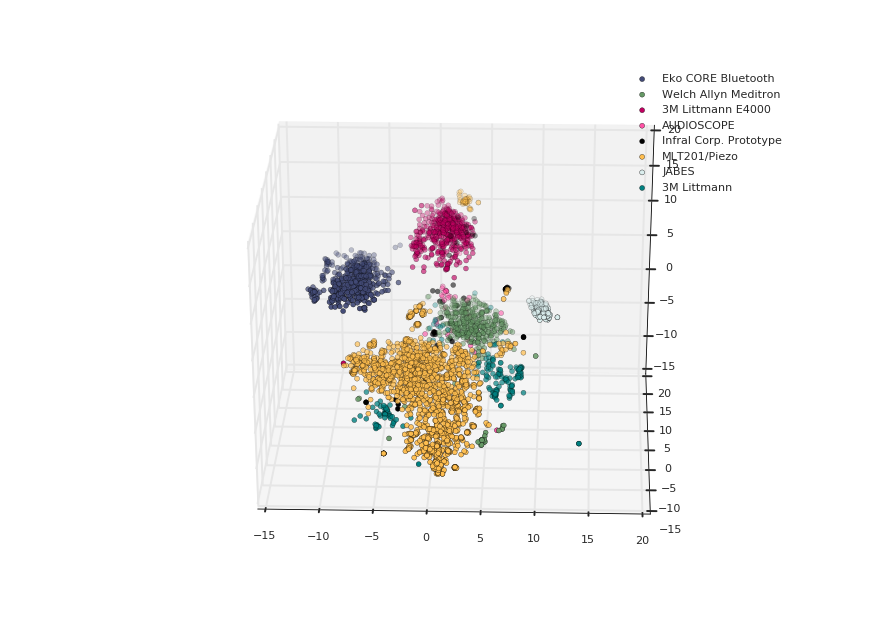

In [195]:
fig = plt.figure(figsize=(11,8))
ax = plt.axes(projection='3d')
sns.set_style('whitegrid')
for stage,color in zip(np.unique(labels[idx]),colors,):
    mask = labels[idx] == stage
    ax.scatter3D(X_embedded[mask,0], X_embedded[mask,1],
                 X_embedded[mask,1], c=color, label=parser[stage]);
ax.azim = -53
ax.elev = 37
ax.legend()
plt.show()

In [888]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=4,
                              random_state=10)

forest.fit(scale(data['dataTrain']), data['TrainLabels'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# for f in range(data['dataTrain'].shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure()
plt.title("Feature importances")
plt.bar(range(data['dataTrain'].shape[1]), importances[indices],
        color="c",
        yerr=std[indices],
        align="center")
# plt.xticks(range(data['dataTrain'].shape[1]), [attrib[each] for each in indices], rotation='vertical')
# plt.xticks(range(data['dataTrain'].shape[1]), indices)
# plt.xlim([-1, 10])
plt.xscale('log')
plt.show()

<IPython.core.display.Javascript object>

In [2]:
# from sklearn.manifold import Isomap
# from sklearn.decomposition import KernelPCA
# from sklearn.preprocessing import scale
# from sklearn.cluster import KMeans
# pca = Isomap(n_neighbors=100,n_components=3,max_iter=2000,path_method='D')
pca = KMeans(n_clusters=7,n_jobs=-1,random_state=1,init='k-means++',max_iter=20000)
X_embedded_ = pca.fit(scale(X_embed))
# X_embedded.shape
kmean = X_embedded_.predict(scale(X_embed))

NameError: name 'KMeans' is not defined

In [89]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)


data = X_embed

n_samples, n_features = data.shape
n_digits = 8
labels

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels[idx], estimator.labels_),
             metrics.completeness_score(labels[idx], estimator.labels_),
             metrics.v_measure_score(labels[idx], estimator.labels_),
             metrics.adjusted_rand_score(labels[idx], estimator.labels_),
             metrics.adjusted_mutual_info_score(labels[idx],  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    return estimator.predict(data)

pre1 = bench_k_means(KMeans(n_clusters=n_digits, n_jobs=-1,n_init=10,
                     random_state=1,init='k-means++',max_iter=20000),
              name="k-means++", data=data)

pre2 = bench_k_means(KMeans(init='random', n_clusters=n_digits,n_jobs=-1,n_init=10,
                     random_state=1,max_iter=20000),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
pre3 = bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits,n_jobs=-1,n_init=10,
                     random_state=1,max_iter=20000),
              name="PCA-based",
              data=data)
print(82 * '_')

n_digits: 8, 	 n_samples 3655, 	 n_features 6373
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	13.64s	14963397	0.687	0.582	0.630	0.447	0.580	0.073
random   	12.45s	14980255	0.688	0.594	0.637	0.464	0.592	0.080
PCA-based	2.37s	15027566	0.706	0.559	0.624	0.408	0.558	0.053
__________________________________________________________________________________


<IPython.core.display.Javascript object>


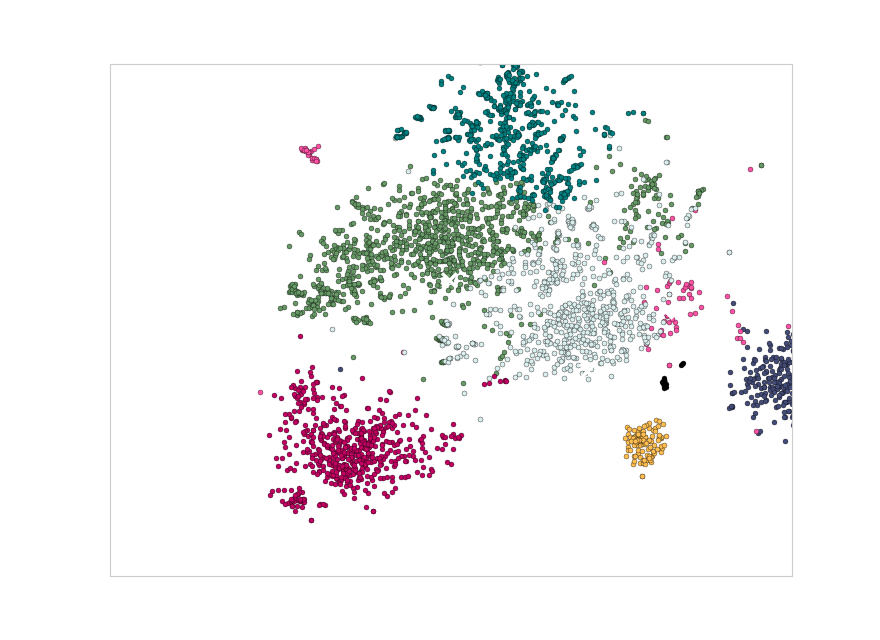

In [31]:
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = X_embedded
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(11,8))
# plt.clf()
# plt.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

target = pre1

for stage,color in zip(np.unique(target),colors):
    mask = target == stage
    plt.scatter(-X_embedded[mask,0],-X_embedded[mask,1],c=color)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
# plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

<IPython.core.display.Javascript object>


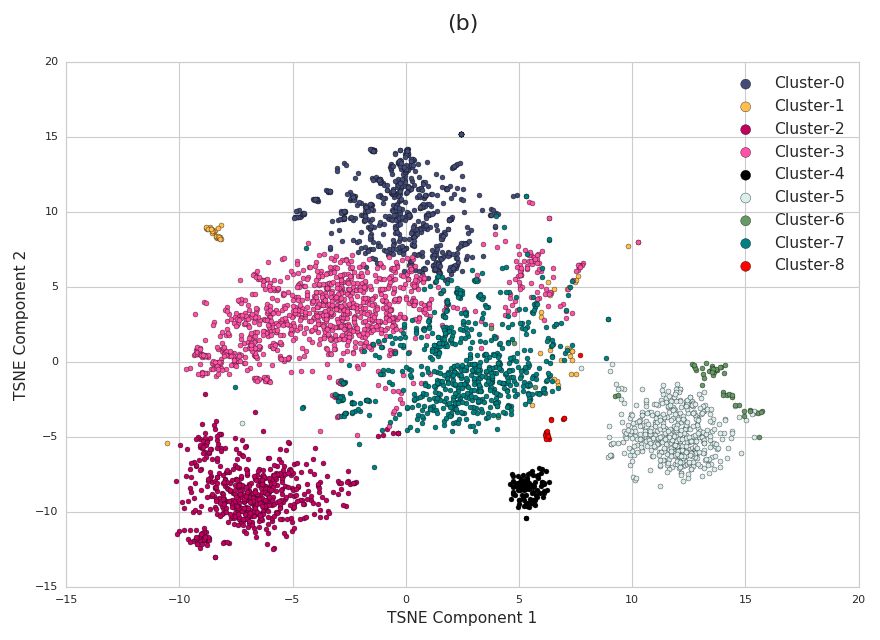

In [68]:
colors = ['#434B77','#ffbe4f','#c10061','#ff51a5','k','#DBEEEE','#669966','#008080','r']
markers = ["o","v","^","<",">","8","s","p"]
sns.set_style('whitegrid')
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=14)
font_title = font_manager.FontProperties(size=20)

target = pre1

fig = plt.figure(figsize=(11,8))
for stage,color,clust in zip(np.unique(target),colors,range(9)):
    mask = target == stage
    plt.scatter(-X_embedded[mask,0],-X_embedded[mask,1],c=color,label='Cluster-'+str(clust))
plt.legend(markerscale=2,fontsize=14)
fig.set_tight_layout(tight=1)
plt.xlabel('TSNE Component 1',fontproperties=font_prop)
plt.ylabel('TSNE Component 2',fontproperties=font_prop)
plt.title('(b)',fontproperties=font_title, y=+1.05)
plt.savefig('KMEANS4.eps')
plt.show()

## TSNE for MLT vs Piezo

In [108]:
traine = data['dataTrain'][idx,:]
mask = labels[idx] == 'e'
traine = traine[mask,:]
traine = scale(traine)

kma = KMeans(n_clusters=2, n_jobs=-1,n_init=10,
                     random_state=1,init='k-means++',max_iter=20000)
kma.fit(traine)
clust = kma.predict(traine)


# traine = PCA(n_components=2).fit_transform(traine)

traine = TSNE(n_components=2,
#                   learning_rate=60,
#                   early_exaggeration=1140.,
                  perplexity=1000, #480-2, 150-3 without exagg and lr
                  init='random',
                  n_iter=2000,
                  verbose=1,
                  ).fit_transform(traine)
traine.shape

[t-SNE] Computing 1870 nearest neighbors...
[t-SNE] Indexed 1871 samples in 0.006s...
[t-SNE] Computed neighbors for 1871 samples in 0.449s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1871
[t-SNE] Computed conditional probabilities for sample 1871 / 1871
[t-SNE] Mean sigma: 31.827172
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.163525
[t-SNE] KL divergence after 1250 iterations: 0.173963


(1871, 2)

<IPython.core.display.Javascript object>


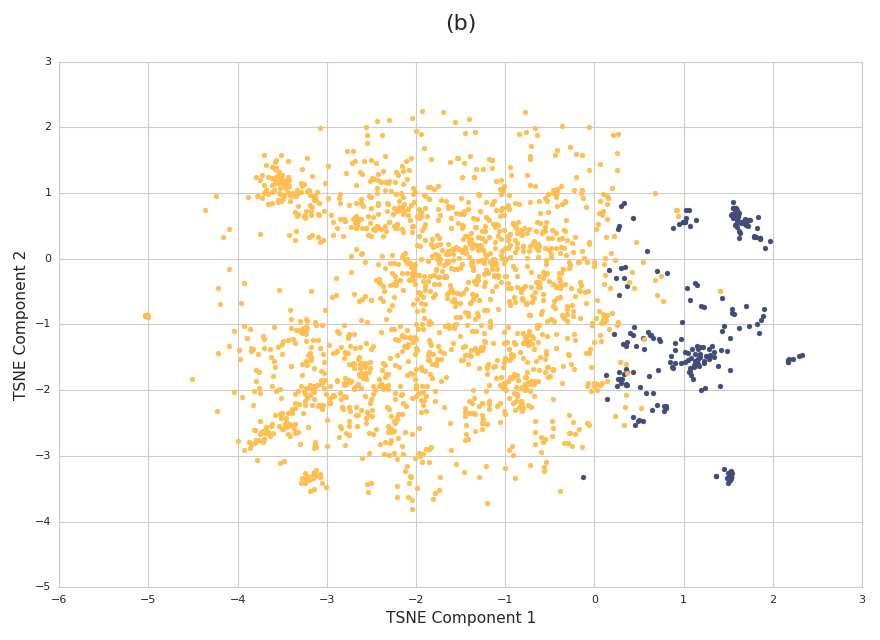

In [109]:
colors = ['#434B77','#ffbe4f','#c10061','#ff51a5','k','#DBEEEE','#669966','#008080']
markers = ["o","v","^","<",">","8","s","p"]
sns.set_style('whitegrid')
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=14)
font_title = font_manager.FontProperties(size=20)

fig = plt.figure(figsize=(11,8))
for each,color in zip(np.unique(clust),colors):
    mask = clust == each
    plt.scatter(traine[mask,0],traine[mask,1],color=color)
# plt.legend(markerscale=2,fontsize=14)
fig.set_tight_layout(tight=1)
plt.xlabel('TSNE Component 1',fontproperties=font_prop)
plt.ylabel('TSNE Component 2',fontproperties=font_prop)
plt.title('(b)',fontproperties=font_title, y=+1.05)
# plt.savefig('KMEANS4.eps')
plt.show()